**Q3**

MOUNTING THE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


importing libraries

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn
np.random.seed(0)
from sklearn.metrics import confusion_matrix

LOADING THE DATA

In [3]:
data = pd.read_excel('/content/drive/MyDrive/nnfl data/Xtr_Q3.xlsx',header=None) ###loading dataset to


In [4]:
data1 = pd.read_excel('/content/drive/MyDrive/nnfl data/Ytr_Q3.xlsx',header=None) ###loading dataset to


In [5]:
data_Xte = pd.read_excel('/content/drive/MyDrive/nnfl data/Xte_Q3.xlsx',header=None)
data_Yte = pd.read_excel('/content/drive/MyDrive/nnfl data/Yte_Q3.xlsx',header=None)

NORMALISING THE TESTING DATA

In [6]:
Xte=data_Xte.values
Yte=data_Yte.values

xminte = np.min(Xte, axis = 0)
xmaxte = np.max(Xte, axis = 0)
Xte = (Xte- xminte)/(xmaxte-xminte)

Yte=Yte-1
Yte=Yte.ravel()

n=Xte.shape[0]
qq = np.ones([n, 1])
Xte = np.append(qq,Xte, axis=1)

print(Xte.shape,Yte.shape)

(119, 61) (119,)


In [7]:
m=data.shape[0]
datan=data.values
data1n=data1.values

y=data1n[:,0] # class label

X=datan # feature matrix


NORMALISING THE TRAINING DATA

In [8]:
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X- xmin)/(xmax-xmin)


ADDING BIAS VECTOR

In [9]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
y=y-1
print(X.shape,y.shape)

(1589, 61) (1589,)


DEFINING SIGMOID FUNCTION

In [10]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z)) ###activation function

DEFINING COST FUNCTIONS

In [11]:
def cost_function(X,y,w): ###define cost function
    hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
    J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) 
    return J

In [12]:
def cost_function_l1(X,y,w,lamb):

   ###define cost function
  hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) + (lamb/2)*np.sum(abs(w)) 
  return J

In [13]:
def cost_function_l2(X,y,w,lamb):
 
   ###define cost function
  hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) + (lamb/2)*np.sum(w**2) 
  return J

DEFINING GRADIENT DESCENT FUNCTIONS

In [14]:
def batch_gradient_descent(X,y,w,alpha,iters):
    cost_history = np.zeros(iters) # cost function for each iteration
       #initalize our cost history list to store the cost function on every iteration
    for i in range(iters):
       
        hypothesis = sigmoid(np.dot(X,w.T))
        w = w - (alpha/len(y)) * np.dot(hypothesis - y,X)
        cost_history[i] = cost_function(X,y,w)
    return w,cost_history

In [15]:
def batch_gradient_descent_l1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  
 # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X) - ((alpha*lamb/2)*np.sign(w))
    cost_history[i] = cost_function_l1(X,y,w,lamb)
  return w,cost_history

In [16]:
def batch_gradient_descent_l2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  
 # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w*(1-alpha*lamb) - (alpha/len(y)) * np.dot(hypothesis - y, X)
    cost_history[i] = cost_function_l1(X,y,w,lamb)
  return w,cost_history

INITIALISING THE WEIGHT VECTOR

In [17]:

w = np.random.randn(1,X.shape[1]).ravel()
w1 = np.random.randn(1,X.shape[1]).ravel()
w2 = np.zeros((1,X.shape[1])).ravel()



IMPLEMENTING LOR WITH BATCH GRADIENT DESCENT

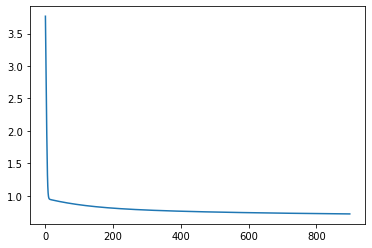

In [18]:
alpha=0.12 ##learning rate
iters=900 ###iterations
X_train=X
y_train=y
batch_w,J_his = batch_gradient_descent(X_train,y_train,w1,alpha,iters)
plt.plot(range(iters),J_his)
# print(J_his)
plt.show()

In [19]:
z_bgd = np.dot(Xte, batch_w.T)
h_bgd = sigmoid(z_bgd)
y_pred_bgd=h_bgd
y_pred_bgd=h_bgd>0.5
y_pred_bgd=y_pred_bgd.astype(int)



In [20]:
cm=confusion_matrix(Yte, y_pred_bgd)
print(cm)

tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

Acc = (tp+tn)/(tp+tn+fp+fn)
SE = tp/(tp+fn)
SP = tn/(tn+fp)

print('Accuracy : ' + str(Acc))
print('sensitivity : ' + str(SE))
print('specificity : ' + str(SP))

[[56  2]
 [58  3]]
Accuracy : 0.4957983193277311
sensitivity : 0.04918032786885246
specificity : 0.9655172413793104


IMPLEMENTING LOR WITH BATCH GRADIENT DESCENT WITH L1 NORM REGULARISATION

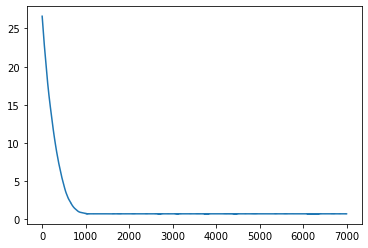

In [21]:
alpha=0.005 ##learning rate
iters=7000 ###iterations
lamb=1
X_train=X
y_train=y
batch_w_l1,J_his_l1 = batch_gradient_descent_l1(X_train,y_train,w,alpha,iters,lamb)
plt.plot(range(iters),J_his_l1)
plt.show()


In [22]:
z_bgd_l1 = np.dot(Xte, batch_w_l1.T)
h_bgd_l1 = sigmoid(z_bgd_l1)
y_pred_bgd_l1=h_bgd_l1>0.5
y_pred_bgd_l1=y_pred_bgd_l1.astype(int)


In [23]:
cm=confusion_matrix(Yte, y_pred_bgd_l1)
print(cm)

tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

Acc = (tp+tn)/(tp+tn+fp+fn)
SE = tp/(tp+fn)
SP = tn/(tn+fp)

print('Accuracy : ' + str(Acc))
print('sensitivity : ' + str(SE))
print('specificity : ' + str(SP))

[[17 41]
 [15 46]]
Accuracy : 0.5294117647058824
sensitivity : 0.7540983606557377
specificity : 0.29310344827586204


IMPLEMENTING LOR WITH BATCH GRADIENT DESCENT WITH L2 NORM REGULARISATION

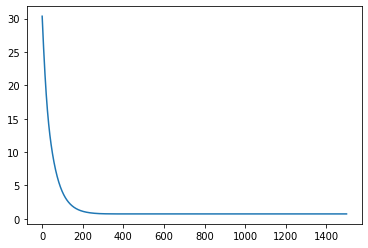

In [24]:
alpha=0.02 ##learning rate
iters=1500 ###iterations
lamb=1
X_train=X
y_train=y
batch_w_l2,J_his_l2 = batch_gradient_descent_l2(X_train,y_train,w1,alpha,iters,lamb)
plt.plot(range(iters),J_his_l2)
plt.show()


In [25]:
z_bgd_l2 = np.dot(Xte, batch_w_l2.T)
h_bgd_l2 = sigmoid(z_bgd_l2)
y_pred_bgd_l2=h_bgd_l2>0.5
y_pred_bgd_l2=y_pred_bgd_l2.astype(int)


In [26]:
cm=confusion_matrix(Yte, y_pred_bgd_l2)
print(cm)

tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

Acc = (tp+tn)/(tp+tn+fp+fn)
SE = tp/(tp+fn)
SP = tn/(tn+fp)

print('Accuracy : ' + str(Acc))
print('sensitivity : ' + str(SE))
print('specificity : ' + str(SP))


[[32 26]
 [37 24]]
Accuracy : 0.47058823529411764
sensitivity : 0.39344262295081966
specificity : 0.5517241379310345
